In [3]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd
import glob

## Read tables

In [4]:
catalogs = glob.glob(f"data/*/dmu26_XID+MIPS_Herschel-Stripe-82_cat*", recursive=True)
cat1=Table.read(catalogs[0])

In [7]:
for c in catalogs[1:]:
    cat = Table.read(c)
    for i,source in enumerate(cat['help_id']):
        if source in cat1['help_id']:
            if cat[i]['FErr_MIPS_24_u'] < cat1[[cat1['help_id']==source]]['FErr_MIPS_24_u']:
                cat1[[cat1['help_id']==source]] = cat[i]
            else:
                continue
        else:
            cat1.add_row(cat[i])
        

In [8]:
Herschel_cat=cat1

## Look at Symmetry of PDFs to determine depth level of catalogue

2.7139604


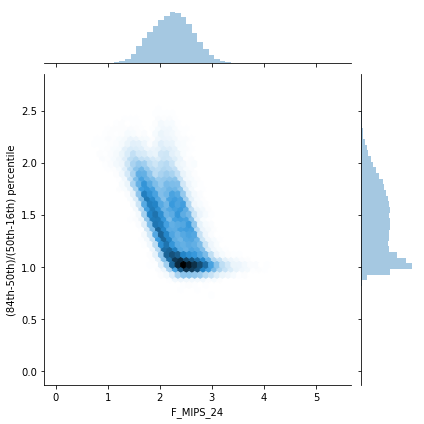

In [14]:
import seaborn as sns
skew=(Herschel_cat['FErr_MIPS_24_u']-Herschel_cat['F_MIPS_24'])/(Herschel_cat['F_MIPS_24']-Herschel_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(Herschel_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~120$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [15]:
from astropy.table import Column
Herschel_cat.add_column(Column(np.zeros(len(Herschel_cat), dtype=bool),name='flag_mips_24'))


In [16]:
ind=(Herschel_cat['Pval_res_24']>0.5) | (Herschel_cat['F_MIPS_24'] < 120.0)

In [17]:
Herschel_cat['flag_mips_24'][ind]=True


In [18]:
Herschel_cat.write('./data/dmu26_XID+MIPS_Herschel-Stripe-82_cat_20190917.fits', format='fits',overwrite=True)

### Check Map


In [19]:
from astropy.io import fits
import pylab as plt

In [24]:
MIPS_pval=fits.open('./data/PVal/dmu26_XID+MIPS_Herschel_Bayes_Pval0.fits')


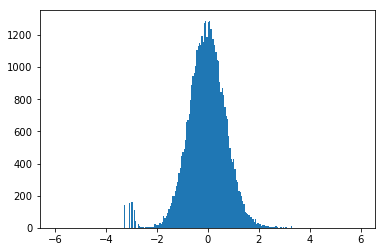

In [25]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

In [23]:
plt.imshow(Pval[1].data)

NameError: name 'Pval' is not defined